In [80]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import datasets
import matplotlib.pyplot as plt

# best to split the data into a train & test batch (75:25 or similar)

In [81]:
# using sklean diabetes dataset
data_X, data_y = datasets.load_diabetes(return_X_y=True)
n = 10
m = len(data_y)
# peaking into the dataset
print(data_X.shape, data_y.shape)
print(data_X[0:5], data_y[0:5])
print(n, m)
print(np.min(data_y), np.max(data_y), np.mean(data_y))

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]] [151.  75. 141. 206. 135.]
10 442
25.0 346.0 152.13348416289594


In [98]:
# function to predict y
def predict(weights, Xs):
    return weights[0] + weights[1:].T.dot(Xs)

# evaluate total cost (predictions of entire dataset)
def cost_function(weights, X):
    losses = []
    for i in range(m):
        losses.append((predict(weights, X[i])-data_y[i])**2)
    return (1/m)*np.sum(losses)

# get derivative with respect to each individual weight
def derive_cost(weights, X):
    H = 0.0000001
    derivatives = np.zeros(n+1)
    for i in range(n+1):
        temp = np.copy(weights)
        temp[i] = temp[i]+H
        a = cost_function(temp, X) - cost_function(weights, X)
        derivatives[i] = a/H
    return derivatives

In [92]:
def absolute_loss(weights, X):
    losses = np.zeros(m)
    for i in range(m):
        losses[i] = abs(predict(weights, X[i])-data_y[i])
    return losses

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
11


100%|█████████████████████████████████████████| 120/120 [00:20<00:00,  5.87it/s]


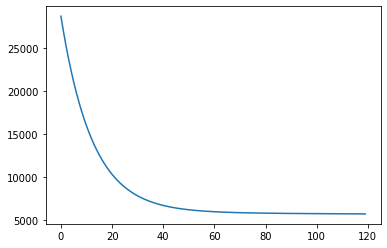

In [159]:
lr = 0.02
n_epochs = 120

my_weights = np.ones(n + 1)
print(my_weights)

los = []
abslos = []

print(len(derive_cost(my_weights, data_X)))
for epoch in tqdm(range(n_epochs)):
    
    temp_weights = np.copy(my_weights)
    for i in range(len(temp_weights)):
        temp_weights[i] = temp_weights[i]-lr*derive_cost(my_weights, data_X)[i]
        
    los.append(cost_function(my_weights, data_X))
    abslos.append(absolute_loss(my_weights, data_X))
        
    my_weights = np.copy(temp_weights)

plt.plot(los)

In [113]:
from random import randint

def display_loss_stats():
    losses = absolute_loss(my_weights, data_X)
    print(np.min(losses), np.max(losses), np.mean(losses))

# evaluate results and compare with labels
print(my_weights)
evals = []
for i in range(m):
    evals.append(predict(my_weights, data_X[i]))
# quickly display n random comparisons using updated weights
for i in range(5):
    r = randint(0, m)
    print("prediction {} [{}] :".format(i, r), predict(my_weights, data_X[r]), data_y[r], end='')
    print("(absolute loss = {})".format(np.abs(predict(my_weights, data_X[r])-data_y[r])))

print(np.sum(absolute_loss(my_weights, data_X)))
display_loss_stats()

[151.00652329   4.18581369   1.66853063  11.12642915   8.5978327
   4.56252785   3.89890741  -5.79473196   8.35420635  10.73848692
   7.54541582]
prediction 0 [264] : 150.48771703437347 145.0(absolute loss = 5.487717034373475)
prediction 1 [264] : 150.48771703437347 145.0(absolute loss = 5.487717034373475)
prediction 2 [99] : 150.6572865667744 83.0(absolute loss = 67.65728656677439)
prediction 3 [354] : 154.07396178504223 272.0(absolute loss = 117.92603821495777)
prediction 4 [170] : 148.68253653659528 47.0(absolute loss = 101.68253653659528)
28545.143784232037
0.42079985014873955 193.1516701520314 64.5817732674933


In [136]:
class Predictor():
    def __slope_and_yintercept(self, X, y):
        if len(X) != len(y):
            print(len(X), "!=", len(y))
            return
        n = int((len(X)+len(y))/2) #they will be same length anyway
        hat = lambda data : (sum([i for i in data]))/len(data)
        xhat, yhat = hat(X), hat(y)
        # slope = m1/m2
        m1 = sum([((X[i]-xhat)*(y[i]-yhat)) for i in range(n)])
        m2 = sum([((X[i]-xhat)**2) for i in range(n)])
        m = m1/m2    
        # y intercept
        c = yhat-(m*xhat)  
        return m, c
    
    def fit(self, X, y):
        self._m, self._c = self.__slope_and_yintercept(X, y)
        
    def predict(self, x):
        return (self._m*x)+self._c

-3327.9681643574127


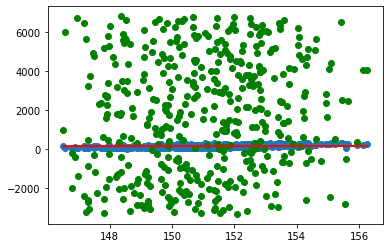

In [158]:
xx = []
yy = []
for i in range(m):
    xx.append(my_weights[0] + (my_weights[1:].dot(data_X[i])))
    yy.append(predict(my_weights, data_X[i]))
    
p = Predictor()
p.fit(xx, data_y)

print(p._c)
    
plt.scatter(xx, data_y)
plt.plot(xx, [predict(my_weights, data_X[i]) for i in range(m)], c='red')
plt.scatter(xx, [p.predict(i) for i in range(m)], c='green')